# Federate Averaging case study for the Cifar-10 dataset
This demo is built upon the paper: https://arxiv.org/pdf/1602.05629.pdf. The demo is focusing in further investigation of the Cifar-10 dataset experiments where we explore unbalanced and non-iid datasets.
The ANN-graph is slightly improved from the original paper where we have introduced batch normalization layers and Adam optimizer.

## Unbalanced dataset
We are exploring 4 different configurations of Federate average for unbalanced datasets: 
1. Uniform average weighting, 1 epoch local training in each round.
2. Dataset-size average weighting, 1 epoch local training in each round.
3. Uniform average weighting, 100 batch steps updates local training in each round.
4. Dataset-size average weighting, 100 batch steps updates local training in each round.

Uniform average weighting:
$f(w) = \sum_{k=1}^{K} \frac{1}{K} f_k(w)$, <br>
Dataset-size average weighting
$f(w) = \sum_{k=1}^{K} \frac{n_k}{n} f_k(w)$, <br> where n=total training size, $n_k$= local training size for member k and K is the number of members in the allince.

The datasets for the unbalanced experiments are iid and divided with following sizes: 48, 98, 196, 391, 782, 1564, 3128, 6256, 12512, 25025.


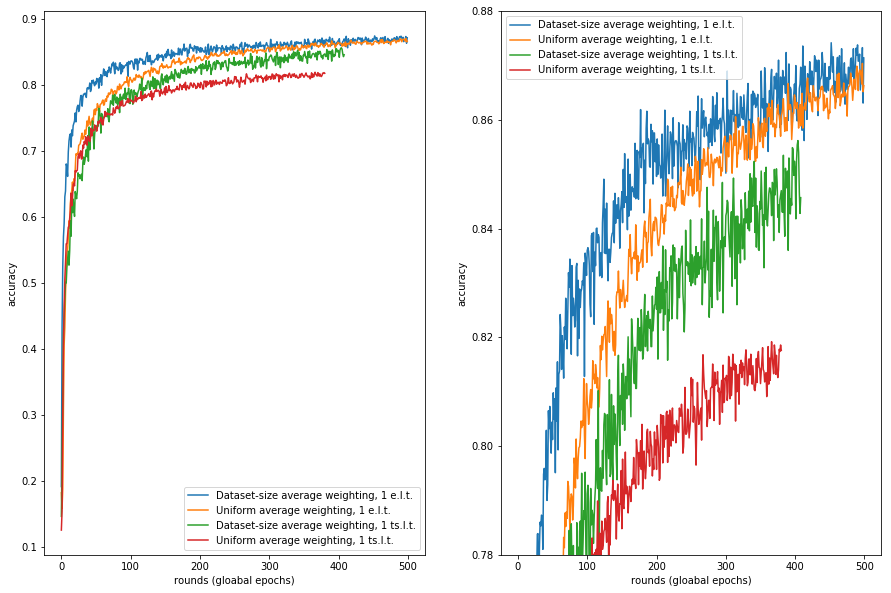

In [35]:
test_loss_unbalanced_modelsizeavg = pickle.load(open('test_loss_unbalanced_modelsizeavg.p','rb'))
test_loss_unbalanced_nomodelsizeavg = pickle.load(open('test_loss_unbalanced_nomodelsizeavg.p','rb'))
test_loss_unbalanced_modelsizeavg_ts = pickle.load(open('test_loss_unbalanced_modelsizeavg_training_steps100.p','rb'))
test_loss_unbalanced_nomodelsizeavg_ts = pickle.load(open('test_loss_unbalanced_nomodelsizeavg_training_steps100.p','rb'))
f, ax = plt.subplots(1,2, figsize = (15,10))

ax[0].plot(test_loss_unbalanced_modelsizeavg, label='Dataset-size average weighting, 1 e.l.t.')
ax[0].plot(test_loss_unbalanced_nomodelsizeavg, label='Uniform average weighting, 1 e.l.t.')
ax[0].plot(test_loss_unbalanced_modelsizeavg_ts, label='Dataset-size average weighting, 1 ts.l.t.')
ax[0].plot(test_loss_unbalanced_nomodelsizeavg_ts, label='Uniform average weighting, 1 ts.l.t.')
ax[0].legend()
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('rounds (gloabal epochs)')

ax[1].plot(test_loss_unbalanced_modelsizeavg, label='Dataset-size average weighting, 1 e.l.t.')
ax[1].plot(test_loss_unbalanced_nomodelsizeavg, label='Uniform average weighting, 1 e.l.t.')
ax[1].plot(test_loss_unbalanced_modelsizeavg_ts, label='Dataset-size average weighting, 1 ts.l.t.')
ax[1].plot(test_loss_unbalanced_nomodelsizeavg_ts, label='Uniform average weighting, 1 ts.l.t.')
ax[1].legend()
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('rounds (gloabal epochs)')
ax[1].set_ylim(0.78,0.88)

plt.show()

## Compare unbalanced members federate average with centralized training and local training.

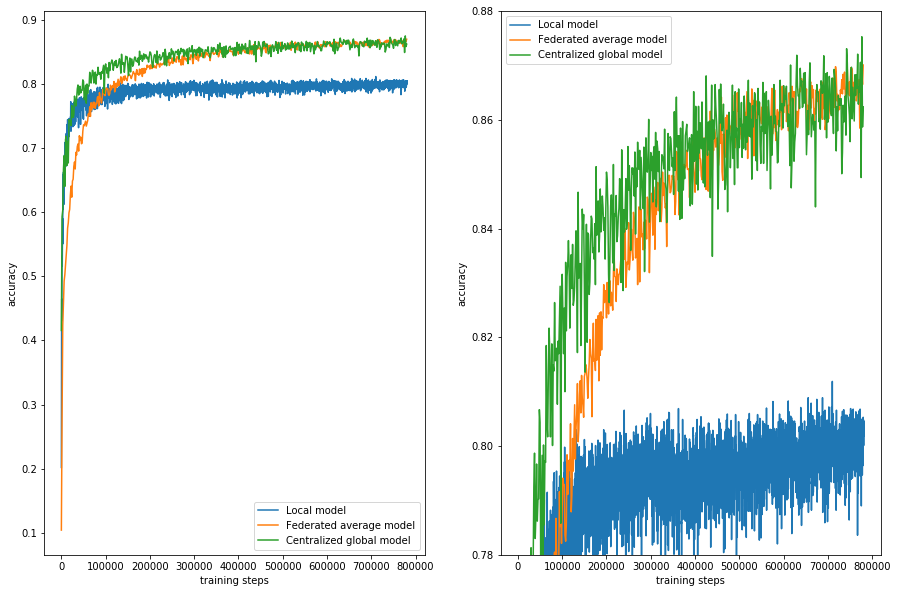

In [32]:
import pickle 
import numpy as np
from matplotlib import pylab as plt
test_loss_loc = pickle.load(open('test_loss_3101e_bigestmember_12members_diffsizes.p','rb'))
test_loss_global = pickle.load(open('test_loss_500e_globalmodel.p','rb'))
test_loss_fed = pickle.load(open('test_loss_500e_12members_diffsizes.p','rb'))

f, ax = plt.subplots(1,2, figsize = (15,10))


training_steps_loc = np.arange(0,781452,252)
training_steps_global = np.arange(0,781500,1563)

ax[0].plot(training_steps_loc, test_loss_loc, label='Local model')
ax[0].plot(training_steps_global,test_loss_fed, label='Federated average model')
ax[0].plot(training_steps_global,test_loss_global, label='Centralized global model')
ax[0].legend()
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('training steps')

ax[1].plot(training_steps_loc, test_loss_loc, label='Local model')
ax[1].plot(training_steps_global,test_loss_fed, label='Federated average model')
ax[1].plot(training_steps_global,test_loss_global, label='Centralized global model')
ax[1].legend()
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('training steps')
ax[1].set_ylim(0.78,0.88)

plt.show()

## Non-iid datasets
We explore non-iid federate average for 6 different levels of non-iid:
1. 3 classes in each member, for an alliance with 10 members.
2. 4 classes in each member, for an alliance with 10 members.
3. 5 classes in each member, for an alliance with 10 members.
4. 6 classes in each member, for an alliance with 10 members.
5. 8 classes in each member, for an alliance with 10 members.
6. 10 classes in each member, for an alliance with 10 members (iid-case).

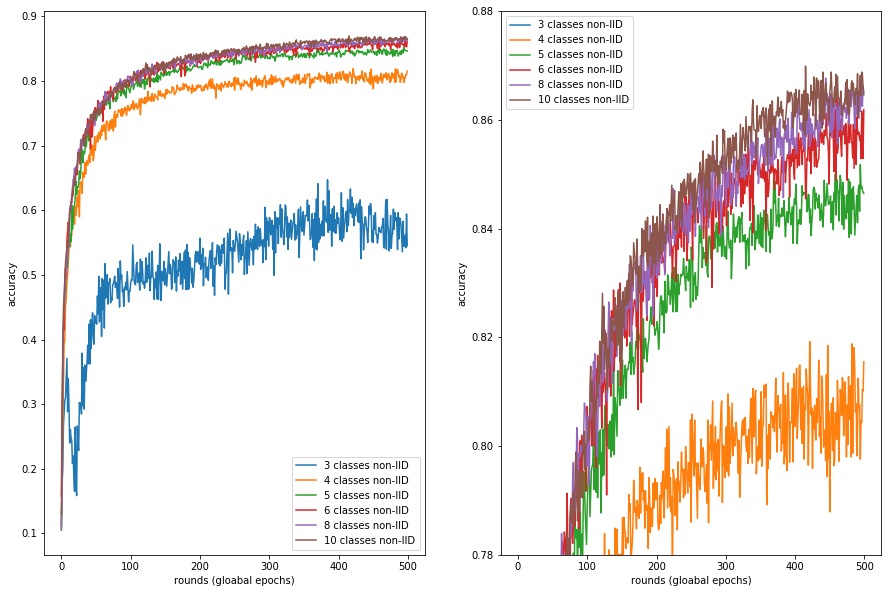

In [24]:
test_loss_fed_3classes = pickle.load(open('test_loss_noniid_10members_3classes.p','rb'))
test_loss_fed_4classes = pickle.load(open('test_loss_noniid_10members_4classes.p','rb'))
test_loss_fed_5classes = pickle.load(open('test_loss_noniid_10members_5classes.p','rb'))
test_loss_fed_6classes = pickle.load(open('test_loss_noniid_10members_6classes.p','rb'))
test_loss_fed_8classes = pickle.load(open('test_loss_noniid_10members_8classes.p','rb'))
test_loss_fed_10classes = pickle.load(open('test_loss_noniid_10members_10classes.p','rb'))

f, ax = plt.subplots(1,2, figsize = (15,10))
ax[0].plot(test_loss_fed_3classes, label='3 classes non-IID')
ax[0].plot(test_loss_fed_4classes, label='4 classes non-IID')
ax[0].plot(test_loss_fed_5classes, label='5 classes non-IID')
ax[0].plot(test_loss_fed_6classes, label='6 classes non-IID')
ax[0].plot(test_loss_fed_8classes, label='8 classes non-IID')
ax[0].plot(test_loss_fed_10classes, label='10 classes non-IID')

ax[0].legend()
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('rounds (gloabal epochs)')

ax[1].plot(test_loss_fed_3classes, label='3 classes non-IID')
ax[1].plot(test_loss_fed_4classes, label='4 classes non-IID')
ax[1].plot(test_loss_fed_5classes, label='5 classes non-IID')
ax[1].plot(test_loss_fed_6classes, label='6 classes non-IID')
ax[1].plot(test_loss_fed_8classes, label='8 classes non-IID')
ax[1].plot(test_loss_fed_10classes, label='10 classes non-IID')

ax[1].legend()
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('rounds (gloabal epochs)')
ax[1].set_ylim(0.78,0.88)
plt.show()

In [ ]:
import numpy as np
def best_so_far(data,extreme=np.max):
    return np.array([extreme(data[:i+1]) for i in range(len(data))])

In [ ]:
training_steps_loc = plt.arange(0,781452,252)
plt.plot(training_steps_loc, best_so_far(test_loss_loc), label='local model: ' + str(np.round(np.max(test_loss_loc),3)))
training_steps_global = plt.arange(0,781500,1563)
plt.plot(training_steps_global,best_so_far(test_loss_global), label='global model: '+ str(np.round(np.max(test_loss_global),3)))
plt.plot(training_steps_global,best_so_far(test_loss_fed), label='fedAVG iid: '+ str(np.round(np.max(test_loss_fed),3)))
plt.plot(training_steps_global[:len(test_loss_fed_5classes)], best_so_far(test_loss_fed_5classes), label='fedAVG non-iid, 5 classes/member: '+ str(np.round(np.max(test_loss_fed_5classes),3)))
plt.plot(training_steps_global[:len(test_loss_fed_3classes)], best_so_far(test_loss_fed_3classes), label='3 classes non-IID: ' + str(np.round(np.max(test_loss_fed_3classes),3)))
plt.legend()
plt.ylim(0.7,0.9)
plt.ylabel('accuracy')
plt.xlabel('training steps')
plt.savefig('lossplot_zoomed_best')

## FedAVG goals:
Maximize accuracy with minimal communication rounds.In general communication time >> computation time.

## Todo:
- Try the FedML for unbalanced data with different local epochs/ or train with fixed nr. of training steps of different sizes and find the setting that reaches some accuracy of interest (maybe 0.85) with minimal communication rounds.
- Try non i.i.d. data: Divide the training data into smaller chunks with same labels in one chunk. Let the datasets of each members be one or moore chunks. 
- Combine non i.i.d. with unbalanced data.
- Move this examples to the AML model.


In [ ]:
test_loss_fed = pickle.load(open('test_loss_noniid_1epochloc.p','rb'))
test_loss_fed_5classes = pickle.load(open('test_loss_example3.p','rb'))

training_steps_global = plt.arange(0,781500,1563)
plt.plot(test_loss_fed, label='2 classes')
plt.plot(test_loss_fed_5classes, label='5 classes')
plt.plot(test_loss_fed_3classes, c='r', label='3 classes non-IID')
plt.plot(best_so_far(test_loss_fed_3classes), c='black', label='3 classes non-IID')

#plt.legend()
plt.title('pathological non-IID partitioned Cifar FedAVG')
plt.ylabel('accuracy')
plt.xlabel('rounds')
plt.legend()
plt.savefig('noniid_lossplot')

In [ ]:
test_loss_fed_3classes_40members = pickle.load(open('test_loss_example6.p','rb'))

plt.plot(test_loss_fed_3classes_40members)